In [222]:
import pandas as pd
import ast
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

DATA CLEANING AND PREPROCESSING

CHENNAI CARS

In [223]:
file_path = r'F:\NITHYA ONLINE DATA SCIENCE\CAPSTONE-3 CAR DECO\chennai_cars.xlsx'
df = pd.read_excel(file_path, sheet_name='chennai_cars.csv')

In [224]:
file_path = r'F:\NITHYA ONLINE DATA SCIENCE\CAPSTONE-3 CAR DECO\chennai_cars.xlsx'
df = pd.read_excel(file_path)

# Function to extract features and icons from structured data
def extract_nested_data(column_data):
    """Extract relevant features and their icons from structured data."""
    df_list = []

    for entry in column_data:  # Iterate directly over the Series
        try:
            row_data = ast.literal_eval(entry) if isinstance(entry, str) else entry
            if 'top' in row_data:
                # Create a dictionary for each key, value, and icon
                row_dict = {f"{item['key']}_value": item['value'] for item in row_data['top'] if 'key' in item and 'value' in item}
                row_dict.update({f"{item['key']}_icon": item['icon'] for item in row_data['top'] if 'key' in item and 'icon' in item})
                df_list.append(row_dict)
            else:
                print(f"No 'top' data found.")
        except Exception as e:
            print(f"Error processing entry: {e}")

    return pd.DataFrame(df_list)

# Extract data from each structured column
car_details_df = pd.json_normalize(df['new_car_detail'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x))
car_overview_df = extract_nested_data(df['new_car_overview'])
car_feature_df = extract_nested_data(df['new_car_feature'])
car_specs_df = extract_nested_data(df['new_car_specs'])
car_links_df=df['car_links']

# Combine all DataFrames into one
chennai_df = pd.concat([car_details_df.reset_index(drop=True),
                                car_overview_df.reset_index(drop=True),
                                car_feature_df.reset_index(drop=True),
                                car_specs_df.reset_index(drop=True),
                                car_links_df.reset_index(drop=True)], axis=1)
# Add a new column named 'city' with the value 'Chennai'
chennai_df.insert(0, 'city', 'Chennai')
# Save the final combined DataFrame to a CSV file
output_file = 'chennai_car_final.csv'
chennai_df.to_csv(output_file, index=False)


print(f" structured data saved to {output_file}")


 structured data saved to chennai_car_final.csv


In [225]:
# Drop the first occurrence of the 'Seats_value' column
chennai_df = chennai_df.loc[:, ~chennai_df.columns.duplicated(keep='first')]

# Print the updated DataFrame to check
print(chennai_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   city                       1419 non-null   object
 1   it                         1419 non-null   int64 
 2   ft                         1419 non-null   object
 3   bt                         1419 non-null   object
 4   km                         1419 non-null   object
 5   transmission               1419 non-null   object
 6   ownerNo                    1419 non-null   int64 
 7   owner                      1419 non-null   object
 8   oem                        1419 non-null   object
 9   model                      1419 non-null   object
 10  modelYear                  1419 non-null   int64 
 11  centralVariantId           1419 non-null   int64 
 12  variantName                1419 non-null   object
 13  price                      1419 non-null   object
 14  priceAct

BANGALORE CARS

In [226]:
file_path = r'F:\NITHYA ONLINE DATA SCIENCE\CAPSTONE-3 CAR DECO\bangalore_cars (1).xlsx'
df = pd.read_excel(file_path)

def extract_nested_data(column_data):
    """Extract relevant features and their icons from structured data."""
    df_list = []

    for entry in column_data:  # Iterate directly over the Series
        try:
            row_data = ast.literal_eval(entry) if isinstance(entry, str) else entry
            if 'top' in row_data:
                # Create a dictionary for each key, value, and icon
                row_dict = {f"{item['key']}_value": item['value'] for item in row_data['top'] if 'key' in item and 'value' in item}
                row_dict.update({f"{item['key']}_icon": item['icon'] for item in row_data['top'] if 'key' in item and 'icon' in item})
                df_list.append(row_dict)
            else:
                print(f"No 'top' data found.")
        except Exception as e:
            print(f"Error processing entry: {e}")

    return pd.DataFrame(df_list)

# Extract data from each structured column
car_details_df = pd.json_normalize(df['new_car_detail'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x))
car_overview_df = extract_nested_data(df['new_car_overview'])
car_feature_df = extract_nested_data(df['new_car_feature'])
car_specs_df = extract_nested_data(df['new_car_specs'])
car_links_df=df['car_links']

# Combine all DataFrames into one
Bangalore_df = pd.concat([car_details_df.reset_index(drop=True),
                                car_overview_df.reset_index(drop=True),
                                car_feature_df.reset_index(drop=True),
                                car_specs_df.reset_index(drop=True),
                                car_links_df.reset_index(drop=True)], axis=1)

# Add a new column named 'city' with the value 'Bangalore'
Bangalore_df.insert(0, 'city', 'Bangalore')
# Save the final combined DataFrame to a CSV file
output_file = 'Bangalore_car_final.csv'
Bangalore_df.to_csv(output_file, index=False)

print(f" structured data saved to {output_file}")

 structured data saved to Bangalore_car_final.csv


In [227]:
# Drop the first occurrence of the 'Seats_value' column
Bangalore_df = Bangalore_df.loc[:, ~Bangalore_df.columns.duplicated(keep='first')]

# Print the updated DataFrame to check
print(Bangalore_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   city                       1481 non-null   object 
 1   it                         1481 non-null   int64  
 2   ft                         1481 non-null   object 
 3   bt                         1481 non-null   object 
 4   km                         1481 non-null   object 
 5   transmission               1481 non-null   object 
 6   ownerNo                    1481 non-null   int64  
 7   owner                      1481 non-null   object 
 8   oem                        1481 non-null   object 
 9   model                      1481 non-null   object 
 10  modelYear                  1481 non-null   int64  
 11  centralVariantId           1481 non-null   int64  
 12  variantName                1481 non-null   object 
 13  price                      1481 non-null   objec

DELHI CARS

In [228]:
# Load the Excel file
file_path = r'F:\NITHYA ONLINE DATA SCIENCE\CAPSTONE-3 CAR DECO\delhi_cars.xlsx'
df = pd.read_excel(file_path)

# Function to extract features and icons from structured data
def extract_nested_data(column_data):
    """Extract relevant features and their icons from structured data."""
    df_list = []

    for entry in column_data:  # Iterate directly over the Series
        try:
            row_data = ast.literal_eval(entry) if isinstance(entry, str) else entry
            if 'top' in row_data:
                # Create a dictionary for each key, value, and icon
                row_dict = {f"{item['key']}_value": item['value'] for item in row_data['top'] if 'key' in item and 'value' in item}
                row_dict.update({f"{item['key']}_icon": item['icon'] for item in row_data['top'] if 'key' in item and 'icon' in item})
                df_list.append(row_dict)
            else:
                print(f"No 'top' data found.")
        except Exception as e:
            print(f"Error processing entry: {e}")

    return pd.DataFrame(df_list)

# Extract data from each structured column
car_details_df = pd.json_normalize(df['new_car_detail'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x))
car_overview_df = extract_nested_data(df['new_car_overview'])
car_feature_df = extract_nested_data(df['new_car_feature'])
car_specs_df = extract_nested_data(df['new_car_specs'])
car_links_df=df['car_links']

# Combine all DataFrames into one
Delhi_df = pd.concat([car_details_df.reset_index(drop=True),
                                car_overview_df.reset_index(drop=True),
                                car_feature_df.reset_index(drop=True),
                                car_specs_df.reset_index(drop=True),
                                car_links_df.reset_index(drop=True)], axis=1)

# Add a new column named 'city' with the value 'Delhi'
Delhi_df.insert(0, 'city', 'Delhi')
# Save the final combined DataFrame to a CSV file
output_file = 'Delhi_car_final.csv'
Delhi_df.to_csv(output_file, index=False)

print(f" structured data saved to {output_file}")

 structured data saved to Delhi_car_final.csv


In [229]:
# Drop the first occurrence of the 'Seats_value' column
Delhi_df = Delhi_df.loc[:, ~Delhi_df.columns.duplicated(keep='first')]

# Print the updated DataFrame to check
print(Delhi_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   city                       1485 non-null   object
 1   it                         1485 non-null   int64 
 2   ft                         1485 non-null   object
 3   bt                         1485 non-null   object
 4   km                         1485 non-null   object
 5   transmission               1485 non-null   object
 6   ownerNo                    1485 non-null   int64 
 7   owner                      1485 non-null   object
 8   oem                        1485 non-null   object
 9   model                      1485 non-null   object
 10  modelYear                  1485 non-null   int64 
 11  centralVariantId           1485 non-null   int64 
 12  variantName                1485 non-null   object
 13  price                      1485 non-null   object
 14  priceAct

HYDERABAD CARS

In [230]:
# Load the Excel file
file_path = r'F:\NITHYA ONLINE DATA SCIENCE\CAPSTONE-3 CAR DECO\hyderabad_cars.xlsx'
df = pd.read_excel(file_path)

# Function to extract features and icons from structured data
def extract_nested_data(column_data):
    """Extract relevant features and their icons from structured data."""
    df_list = []

    for entry in column_data:  # Iterate directly over the Series
        try:
            row_data = ast.literal_eval(entry) if isinstance(entry, str) else entry
            if 'top' in row_data:
                # Create a dictionary for each key, value, and icon
                row_dict = {f"{item['key']}_value": item['value'] for item in row_data['top'] if 'key' in item and 'value' in item}
                row_dict.update({f"{item['key']}_icon": item['icon'] for item in row_data['top'] if 'key' in item and 'icon' in item})
                df_list.append(row_dict)
            else:
                print(f"No 'top' data found.")
        except Exception as e:
            print(f"Error processing entry: {e}")

    return pd.DataFrame(df_list)

# Extract data from each structured column
car_details_df = pd.json_normalize(df['new_car_detail'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x))
car_overview_df = extract_nested_data(df['new_car_overview'])
car_feature_df = extract_nested_data(df['new_car_feature'])
car_specs_df = extract_nested_data(df['new_car_specs'])
car_links_df=df['car_links']

# Combine all DataFrames into one
Hyderabad_df = pd.concat([car_details_df.reset_index(drop=True),
                                car_overview_df.reset_index(drop=True),
                                car_feature_df.reset_index(drop=True),
                                car_specs_df.reset_index(drop=True),
                                car_links_df.reset_index(drop=True)], axis=1)

# Add a new column named 'city' with the value 'Delhi'
Hyderabad_df.insert(0, 'city', 'Hyderabad')
# Save the final combined DataFrame to a CSV file
output_file = 'Hyderabad_car_final.csv'
Hyderabad_df.to_csv(output_file, index=False)

print(f" structured data saved to {output_file}")

 structured data saved to Hyderabad_car_final.csv


In [231]:
# Drop the first occurrence of the 'Seats_value' column
Hyderabad_df = Hyderabad_df.loc[:, ~Hyderabad_df.columns.duplicated(keep='first')]

# Print the updated DataFrame to check
print(Hyderabad_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   city                       1483 non-null   object 
 1   it                         1483 non-null   int64  
 2   ft                         1483 non-null   object 
 3   bt                         1483 non-null   object 
 4   km                         1483 non-null   object 
 5   transmission               1483 non-null   object 
 6   ownerNo                    1483 non-null   int64  
 7   owner                      1483 non-null   object 
 8   oem                        1483 non-null   object 
 9   model                      1483 non-null   object 
 10  modelYear                  1483 non-null   int64  
 11  centralVariantId           1483 non-null   int64  
 12  variantName                1483 non-null   object 
 13  price                      1483 non-null   objec

JAIPUR CARS

In [232]:
# Load the Excel file
file_path = r'F:\NITHYA ONLINE DATA SCIENCE\CAPSTONE-3 CAR DECO\jaipur_cars.xlsx'
df = pd.read_excel(file_path)

# Function to extract features and icons from structured data
def extract_nested_data(column_data):
    """Extract relevant features and their icons from structured data."""
    df_list = []

    for entry in column_data:  # Iterate directly over the Series
        try:
            row_data = ast.literal_eval(entry) if isinstance(entry, str) else entry
            if 'top' in row_data:
                # Create a dictionary for each key, value, and icon
                row_dict = {f"{item['key']}_value": item['value'] for item in row_data['top'] if 'key' in item and 'value' in item}
                row_dict.update({f"{item['key']}_icon": item['icon'] for item in row_data['top'] if 'key' in item and 'icon' in item})
                df_list.append(row_dict)
            else:
                print(f"No 'top' data found.")
        except Exception as e:
            print(f"Error processing entry: {e}")

    return pd.DataFrame(df_list)

# Extract data from each structured column
car_details_df = pd.json_normalize(df['new_car_detail'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x))
car_overview_df = extract_nested_data(df['new_car_overview'])
car_feature_df = extract_nested_data(df['new_car_feature'])
car_specs_df = extract_nested_data(df['new_car_specs'])
car_links_df=df['car_links']

# Combine all DataFrames into one
Jaipur_df = pd.concat([car_details_df.reset_index(drop=True),
                                car_overview_df.reset_index(drop=True),
                                car_feature_df.reset_index(drop=True),
                                car_specs_df.reset_index(drop=True),
                                car_links_df.reset_index(drop=True)], axis=1)

# Add a new column named 'city' with the value 'Delhi'
Jaipur_df.insert(0, 'city', 'Jaipur')
# Save the final combined DataFrame to a CSV file
output_file = 'Jaipur_car_final.csv'
Jaipur_df.to_csv(output_file, index=False)

print(f" structured data saved to {output_file}")

 structured data saved to Jaipur_car_final.csv


In [233]:
# Drop the first occurrence of the 'Seats_value' column
Jaipur_df = Jaipur_df.loc[:, ~Jaipur_df.columns.duplicated(keep='first')]

# Print the updated DataFrame to check
print(Jaipur_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   city                       1120 non-null   object 
 1   it                         1120 non-null   int64  
 2   ft                         1120 non-null   object 
 3   bt                         1120 non-null   object 
 4   km                         1120 non-null   object 
 5   transmission               1120 non-null   object 
 6   ownerNo                    1120 non-null   int64  
 7   owner                      1120 non-null   object 
 8   oem                        1120 non-null   object 
 9   model                      1120 non-null   object 
 10  modelYear                  1120 non-null   int64  
 11  centralVariantId           1120 non-null   int64  
 12  variantName                1120 non-null   object 
 13  price                      1120 non-null   objec

KOLKATA CARS

In [234]:
# Load the Excel file
file_path = r'F:\NITHYA ONLINE DATA SCIENCE\CAPSTONE-3 CAR DECO\kolkata_cars.xlsx'
df = pd.read_excel(file_path)

# Function to extract features and icons from structured data
def extract_nested_data(column_data):
    """Extract relevant features and their icons from structured data."""
    df_list = []

    for entry in column_data:  # Iterate directly over the Series
        try:
            row_data = ast.literal_eval(entry) if isinstance(entry, str) else entry
            if 'top' in row_data:
                # Create a dictionary for each key, value, and icon
                row_dict = {f"{item['key']}_value": item['value'] for item in row_data['top'] if 'key' in item and 'value' in item}
                row_dict.update({f"{item['key']}_icon": item['icon'] for item in row_data['top'] if 'key' in item and 'icon' in item})
                df_list.append(row_dict)
            else:
                print(f"No 'top' data found.")
        except Exception as e:
            print(f"Error processing entry: {e}")

    return pd.DataFrame(df_list)

# Extract data from each structured column
car_details_df = pd.json_normalize(df['new_car_detail'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x))
car_overview_df = extract_nested_data(df['new_car_overview'])
car_feature_df = extract_nested_data(df['new_car_feature'])
car_specs_df = extract_nested_data(df['new_car_specs'])
car_links_df=df['car_links']

# Combine all DataFrames into one
Kolkata_df = pd.concat([car_details_df.reset_index(drop=True),
                                car_overview_df.reset_index(drop=True),
                                car_feature_df.reset_index(drop=True),
                                car_specs_df.reset_index(drop=True),
                                car_links_df.reset_index(drop=True)], axis=1)

# Add a new column named 'city' with the value 'Delhi'
Kolkata_df.insert(0, 'city', 'Kolkata')
# Save the final combined DataFrame to a CSV file
output_file = 'Kolkata_car_final.csv'
Kolkata_df.to_csv(output_file, index=False)

print(f" structured data saved to {output_file}")

 structured data saved to Kolkata_car_final.csv


In [235]:
# Drop the first occurrence of the 'Seats_value' column
Kolkata_df = Kolkata_df.loc[:, ~Kolkata_df.columns.duplicated(keep='first')]

# Print the updated DataFrame to check
print(Kolkata_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   city                       1381 non-null   object 
 1   it                         1381 non-null   int64  
 2   ft                         1381 non-null   object 
 3   bt                         1381 non-null   object 
 4   km                         1381 non-null   object 
 5   transmission               1381 non-null   object 
 6   ownerNo                    1381 non-null   int64  
 7   owner                      1381 non-null   object 
 8   oem                        1381 non-null   object 
 9   model                      1381 non-null   object 
 10  modelYear                  1381 non-null   int64  
 11  centralVariantId           1381 non-null   int64  
 12  variantName                1381 non-null   object 
 13  price                      1381 non-null   objec

In [236]:
# Concatenate all city DataFrames
all_city_cars = pd.concat([chennai_df, Bangalore_df, Delhi_df, Hyderabad_df, Jaipur_df, Kolkata_df], ignore_index=True)

# Save the combined DataFrame to a CSV file
output_csv_file = 'all_city_cars.csv'
all_city_cars.to_csv(output_csv_file, index=False)

print(f"All city cars data saved to {output_csv_file}")


All city cars data saved to all_city_cars.csv


In [237]:
all_city_cars=pd.read_csv(r'F:\NITHYA ONLINE DATA SCIENCE\CAPSTONE-3 CAR DECO\all_city_cars.csv')
all_city_cars

,city,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,Ownership_icon,Engine Displacement_icon,Transmission_icon,Year of Manufacture_icon,Engine_value,Max Power_value,Torque_value,Wheel Size_value,Mileage_value,car_links
0,Chennai,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,...,https://images10.gaadi.com/listing/vdp/co/v1/o...,https://images10.gaadi.com/listing/vdp/co/v1/e...,https://images10.gaadi.com/listing/vdp/co/v1/t...,https://images10.gaadi.com/listing/vdp/co/v1/y...,998 CC,118.36bhp,172nm,16,NaN,https://www.cardekho.com/used-car-details/used...
1,Chennai,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,...,https://images10.gaadi.com/listing/vdp/co/v1/o...,https://images10.gaadi.com/listing/vdp/co/v1/e...,https://images10.gaadi.com/listing/vdp/co/v1/t...,https://images10.gaadi.com/listing/vdp/co/v1/y...,1196 CC,73bhp,101Nm,NaN,15.37 kmpl,https://www.cardekho.com/buy-used-car-details/...
2,Chennai,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,...,https://images10.gaadi.com/listing/vdp/co/v1/o...,https://images10.gaadi.com/listing/vdp/co/v1/e...,https://images10.gaadi.com/listing/vdp/co/v1/t...,https://images10.gaadi.com/listing/vdp/co/v1/y...,999 CC,98.63bhp,160Nm,16,20 kmpl,https://www.cardekho.com/used-car-details/used...
3,Chennai,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,...,https://images10.gaadi.com/listing/vdp/co/v1/o...,https://images10.gaadi.com/listing/vdp/co/v1/e...,https://images10.gaadi.com/listing/vdp/co/v1/t...,https://images10.gaadi.com/listing/vdp/co/v1/y...,1086 CC,68.05bhp,99.04Nm,NaN,19.81 kmpl,https://www.cardekho.com/buy-used-car-details/...
4,Chennai,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,...,https://images10.gaadi.com/listing/vdp/co/v1/o...,https://images10.gaadi.com/listing/vdp/co/v1/e...,https://images10.gaadi.com/listing/vdp/co/v1/t...,https://images10.gaadi.com/listing/vdp/co/v1/y...,1199 CC,88.7bhp,110Nm,15,18.7 kmpl,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,...,https://images10.gaadi.com/listing/vdp/co/v1/o...,https://images10.gaadi.com/listing/vdp/co/v1/e...,https://images10.gaadi.com/listing/vdp/co/v1/t...,https://images10.gaadi.com/listing/vdp/co/v1/y...,998 CC,65.71bhp,89Nm,NaN,25.24 kmpl,https://www.cardekho.com/used-car-details/used...
8365,Kolkata,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,...,https://images10.gaadi.com/listing/vdp/co/v1/o...,https://images10.gaadi.com/listing/vdp/co/v1/e...,https://images10.gaadi.com/listing/vdp/co/v1/t...,https://images10.gaadi.com/listing/vdp/co/v1/y...,796 CC,47.3bhp,69Nm,NaN,22.74 kmpl,https://www.cardekho.com/used-car-details/used...
8366,Kolkata,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,...,https://images10.gaadi.com/listing/vdp/co/v1/o...,https://images10.gaadi.com/listing/vdp/co/v1/e...,https://images10.gaadi.com/listing/vdp/co/v1/t...,https://images10.gaadi.com/listing/vdp/co/v1/y...,1796 CC,186bhp,285Nm,17,11.74 kmpl,https://www.cardekho.com/used-car-details/used...
8367,Kolkata,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,...,https://images10.gaadi.com/listing/vdp/co/v1/o...,https://images10.gaadi.com/listing/vdp/co/v1/e...,https://images10.gaadi.com/listing/vdp/co/v1/t...,https://images10.gaadi.com/listing/vdp/co/v1/y...,1197 CC,85.80bhp,114Nm,14,18.5 kmpl,https://www.cardekho.com/used-car-details/used...


In [238]:
all_city_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   city                       8369 non-null   object 
 1   it                         8369 non-null   int64  
 2   ft                         8369 non-null   object 
 3   bt                         8365 non-null   object 
 4   km                         8369 non-null   object 
 5   transmission               8369 non-null   object 
 6   ownerNo                    8369 non-null   int64  
 7   owner                      8369 non-null   object 
 8   oem                        8369 non-null   object 
 9   model                      8369 non-null   object 
 10  modelYear                  8369 non-null   int64  
 11  centralVariantId           8369 non-null   int64  
 12  variantName                8369 non-null   object 
 13  price                      8369 non-null   objec

 Identifying Missing Values

In [239]:
missing_values = all_city_cars.isnull().sum()
print(missing_values[missing_values > 0])


bt                              4
priceActual                  6699
priceSaving                  8369
priceFixedText               8369
Registration Year_value        52
Insurance Validity_value        4
Seats_value                     6
Kms Driven_value                2
RTO_value                     894
Ownership_value                32
Engine Displacement_value       4
Year of Manufacture_value      20
Registration Year_icon         52
Insurance Validity_icon         4
Seats_icon                      6
Kms Driven_icon                 2
RTO_icon                      888
Ownership_icon                 32
Engine Displacement_icon        4
Year of Manufacture_icon       20
Engine_value                    4
Max Power_value                60
Torque_value                   60
Wheel Size_value             2983
Mileage_value                 287
dtype: int64


Drop unwanted column

In [240]:
# Now drop all icon columns
icon_columns = [
    'Registration Year_icon', 'Insurance Validity_icon', 'Seats_icon', 
    'Kms Driven_icon', 'RTO_icon', 'Engine Displacement_icon', 'Year of Manufacture_icon',
    'Fuel Type_icon','Ownership_icon','Transmission_icon'       
]

all_city_cars.drop(columns=icon_columns, inplace=True)

# Engine Displacement_value  and Engine_value are same column so drop any one column
all_city_cars.drop(columns='Engine_value', inplace=True)

# Kms Driven_value   and  km   are same column so drop any one column
all_city_cars.drop(columns='Kms Driven_value',inplace=True)

# owner,Ownership_value and ownerNo are same column so drop any one column
all_city_cars.drop(columns=['owner','Ownership_value'],inplace=True)


# Drop 0 non null value column
all_city_cars.drop(columns=['priceSaving', 'priceFixedText'], inplace=True)
all_city_cars.drop(columns='priceActual',inplace=True)

# Drop unwanted column every row with same data
all_city_cars.drop(columns=['trendingText.imgUrl','trendingText.heading','trendingText.desc'],inplace=True)




Handling Missing Values

In [241]:
# Fill missing 'bt' (body type) values by propagating values within the same 'model'
all_city_cars['bt'] = all_city_cars.groupby('model')['bt'].transform(lambda group: group.ffill().bfill())


# If any missing values remain, fill them with the most common 'bt' value
all_city_cars['bt'].fillna(all_city_cars['bt'].mode()[0], inplace=True)



C:\Users\hp\AppData\Local\Temp\ipykernel_11868\366301537.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_city_cars['bt'] = all_city_cars.groupby('model')['bt'].transform(lambda group: group.ffill().bfill())
C:\Users\hp\AppData\Local\Temp\ipykernel_11868\366301537.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original 

In [242]:

# Handling missing values for numerical columns
all_city_cars['Year of Manufacture_value'].fillna('2022', inplace=True)# every unknown column registration year is 2022

# Handling missing values for categorical columns
all_city_cars['RTO_value'].fillna('Unknown', inplace=True)
all_city_cars['Seats_value'].fillna('Unknown', inplace=True)
all_city_cars['Wheel Size_value'].fillna('Unknown', inplace=True)



# Handling remaining columns as needed
all_city_cars['Engine Displacement_value'].fillna(all_city_cars['Engine Displacement_value'].mode()[0], inplace=True)
all_city_cars['Registration Year_value'].fillna(all_city_cars['Registration Year_value'].mode()[0], inplace=True)
all_city_cars['Insurance Validity_value'].fillna(all_city_cars['Insurance Validity_value'].mode()[0], inplace=True)


# Fill missing 'Wheel Size_value '  values by propagating values within the same 'model'
all_city_cars['Wheel Size_value'] = all_city_cars.groupby('model')['Wheel Size_value'].transform(lambda group: group.ffill().bfill())

# Fill missing 'Mileage_value'  values by propagating values within the same 'model'
all_city_cars['Mileage_value'] = all_city_cars.groupby('model')['Mileage_value'].transform(lambda group: group.ffill().bfill())

# If any missing values remain, fill them with the most common 'bt' value
all_city_cars['Mileage_value'].fillna(all_city_cars['Mileage_value'].mode()[0], inplace=True)



C:\Users\hp\AppData\Local\Temp\ipykernel_11868\382108232.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_city_cars['Year of Manufacture_value'].fillna('2022', inplace=True)# every unknown column registration year is 2022
C:\Users\hp\AppData\Local\Temp\ipykernel_11868\382108232.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2022' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  all_city_cars[

In [243]:
all_city_cars.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   city                       8369 non-null   object
 1   it                         8369 non-null   int64 
 2   ft                         8369 non-null   object
 3   bt                         8369 non-null   object
 4   km                         8369 non-null   object
 5   transmission               8369 non-null   object
 6   ownerNo                    8369 non-null   int64 
 7   oem                        8369 non-null   object
 8   model                      8369 non-null   object
 9   modelYear                  8369 non-null   int64 
 10  centralVariantId           8369 non-null   int64 
 11  variantName                8369 non-null   object
 12  price                      8369 non-null   object
 13  Registration Year_value    8369 non-null   object
 14  Insuranc

In [366]:
# Save the cleaned data
all_city_cars.to_csv('all_city_cars_cleaned.csv', index=False)
all_city_cars_df=pd.read_csv('all_city_cars_cleaned.csv')

In [367]:
all_city_cars_df

,city,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,...,Seats_value,RTO_value,Engine Displacement_value,Transmission_value,Year of Manufacture_value,Max Power_value,Torque_value,Wheel Size_value,Mileage_value,car_links
0,Chennai,0,Petrol,SUV,"20,000",Automatic,1,Kia,Kia Sonet,2022,...,5 Seats,TN02,998 cc,Automatic,2022.0,118.36bhp,172nm,16,18.2 kmpl,https://www.cardekho.com/used-car-details/used...
1,Chennai,0,Petrol,Minivans,"20,687",Manual,1,Maruti,Maruti Eeco,2015,...,7 Seats,TN04,1196 cc,Manual,2015.0,73bhp,101Nm,Unknown,15.37 kmpl,https://www.cardekho.com/buy-used-car-details/...
2,Chennai,0,Petrol,SUV,"30,000",Manual,1,Nissan,Nissan Magnite,2021,...,5 Seats,TN22,999 cc,Manual,2021.0,98.63bhp,160Nm,16,20 kmpl,https://www.cardekho.com/used-car-details/used...
3,Chennai,0,Petrol,Hatchback,"59,247",Manual,1,Hyundai,Hyundai i10,2015,...,5 Seats,TN11,1086 cc,Manual,2015.0,68.05bhp,99.04Nm,Unknown,19.81 kmpl,https://www.cardekho.com/buy-used-car-details/...
4,Chennai,0,Petrol,Hatchback,"50,000",Manual,1,Honda,Honda Jazz,2015,...,5 Seats,KA03,1199 cc,Manual,2015.0,88.7bhp,110Nm,15,18.7 kmpl,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,Petrol,Hatchback,"10,000",Manual,1,Maruti,Maruti Celerio,2022,...,5 Seats,Unknown,998 cc,Manual,2022.0,65.71bhp,89Nm,Unknown,25.24 kmpl,https://www.cardekho.com/used-car-details/used...
8365,Kolkata,0,Petrol,Hatchback,"1,20,000",Manual,1,Maruti,Maruti Alto 800,2014,...,5 Seats,Unknown,796 cc,Manual,2014.0,47.3bhp,69Nm,Unknown,22.74 kmpl,https://www.cardekho.com/used-car-details/used...
8366,Kolkata,0,Petrol,Sedan,"50,000",Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,5 Seats,WB06,1796 cc,Automatic,2011.0,186bhp,285Nm,17,11.74 kmpl,https://www.cardekho.com/used-car-details/used...
8367,Kolkata,0,Petrol,Hatchback,"40,000",Manual,1,Maruti,Maruti Ritz,2012,...,5 Seats,Unknown,1197 cc,Manual,2012.0,85.80bhp,114Nm,14,18.5 kmpl,https://www.cardekho.com/used-car-details/used...


Standardising Data Formats:

In [369]:
# Ensure 'km' is treated as a string, remove commas, and convert to integer safely
all_city_cars_df['km'] = all_city_cars_df['km'].astype(str).str.replace(',', '')

# Use pd.to_numeric to convert, coercing errors to NaN
all_city_cars_df['km'] = pd.to_numeric(all_city_cars_df['km'], errors='coerce')

In [370]:
def convert_numeric(value):
    new = value.replace("₹", "").replace(',', '').strip()
    if "Lakh" in new:
        return float(new.replace('Lakh', '').strip()) * 1e5
    elif "Crore" in new:
        return float(new.replace("Crore", "").strip()) * 1e7
    else:
        return float(new)

all_city_cars_df["price "] = all_city_cars_df["price"].apply(convert_numeric)

In [371]:
def extract_year(value):
    return '20' + value[-2:] if len(value) > 2 else value

# Apply the function to the 'Registration Year_value' column
all_city_cars_df['Registration Year_value'] = all_city_cars_df['Registration Year_value'].apply(extract_year)

all_city_cars_df['Registration Year_value'] = all_city_cars_df['Registration Year_value'].astype(int)


In [372]:
def extract_seats(value):
    if isinstance(value, str):  # Check if the value is a string
        try:
            return int(value.split()[0])  # Extract the first part and convert to int
        except (ValueError, IndexError):
            return None
    return None  # Return None for non-string (e.g., float) values

# Apply the function to extract seat values
all_city_cars_df['Seats_value'] = all_city_cars_df['Seats_value'].apply(extract_seats)

# Drop rows where 'Seats_value' is NaN
all_city_cars_df.dropna(subset=['Seats_value'], inplace=True)

# Convert the 'Seats_value' column to integers
all_city_cars_df['Seats_value'] = all_city_cars_df['Seats_value'].astype(int)



In [373]:
def extract_cc(value):
    if isinstance(value, str):  # Check if the value is a string
        try:
            return int(value.split()[0])  # Extract the first part and convert to int
        except (ValueError, IndexError):
            return None
    return None  # Return None for non-string (e.g., float) values

# Apply the function to extract seat values
all_city_cars_df['Engine Displacement_value(cc)'] = all_city_cars_df['Engine Displacement_value'].apply(extract_cc)

# Convert the 'Engine Displacement_value in cc' column to integers
all_city_cars_df['Engine Displacement_value(cc)' ] = all_city_cars_df['Engine Displacement_value(cc)'].astype(int)

# Drop the old 'Engine Displacement_value' column 
all_city_cars_df.drop('Engine Displacement_value', axis=1, inplace=True)

In [374]:
# Convert the 'Year of Manufacture_value ' column to integers
all_city_cars_df['Year of Manufacture_value' ] = all_city_cars_df['Year of Manufacture_value'].astype(int)

In [375]:
all_city_cars_df.dropna(subset=['Max Power_value'], inplace=True)

# Function to clean and normalize power values
def clean_power(value):
    match = re.search(r"(\d*\.?\d+)\s*(PS|hp|bhp)?", str(value), re.IGNORECASE)
    if match:
        value = float(match.group(1))  # Extract the numerical value
        unit = match.group(2)  # Extract the unit (if any)
        if unit and 'hp' in unit.lower():
            value *= 1.014  # Convert HP/bhp to PS
        return round(value, 2)
    return None

# Apply the cleaning function to the 'Max Power Value' column
all_city_cars_df['Max Power_value(bhp)'] = all_city_cars_df['Max Power_value'].apply(clean_power)

# Drop the old column
all_city_cars_df.drop('Max Power_value', axis=1, inplace=True)

In [376]:
all_city_cars_df.dropna(subset=['Torque_value'], inplace=True)

#  Function to clean and normalize torque values
def clean_torque(value):
    # Check for blank or empty values
    if pd.isna(value) or str(value).strip() == '':
        return None  # You can return 0 or '' if preferred instead of None

    # Match numerical value with optional unit (Nm, nm, kgm) or just the number
    match = re.search(r"(\d*\.?\d+)\s*(Nm|nm|kgm)?", str(value), re.IGNORECASE)
    
    if match:
        value = float(match.group(1))  # Extract the numerical value
        unit = match.group(2)  # Extract the unit (if any)
        
        # If no unit is mentioned
        if not unit:
            # If value is below 90, treat as kgm and convert to Nm
            if value < 90:
                value *= 9.80665  # Convert kgm to Nm
        else:
            # If unit is kgm, convert to Nm
            if 'kgm' in unit.lower():
                value *= 9.80665  # Convert kgm to Nm
        
        # If value is 90 or above, treat as Nm
        return round(value, 2)  # Return the cleaned and rounded value in Nm
    return None

# Apply the cleaning function to the 'Torque_value' column
all_city_cars_df['Torque_value(Nm)'] = all_city_cars_df['Torque_value'].apply(clean_torque)

# Drop the old column
all_city_cars_df.drop('Torque_value', axis=1, inplace=True)


In [377]:
# Drop the column Wheel Size_value because it have more unknown value
all_city_cars_df.drop('Wheel Size_value', axis=1, inplace=True)

In [378]:
# Function to clean and normalize mileage values
def clean_mileage(value):
    # Check for blank or empty values
    if pd.isna(value) or str(value).strip() == '':
        return None  # Return None or 0 as preferred

    # Match numerical value with optional unit (kmpl)
    match = re.search(r"(\d*\.?\d+)\s*(kmpl)?", str(value), re.IGNORECASE)
    
    if match:
        return round(float(match.group(1)), 2)  # Return the cleaned and rounded value
    return None

# Apply the cleaning function to the 'Mileage_value' column
all_city_cars_df['Mileage_value(kmpl)'] = all_city_cars_df['Mileage_value'].apply(clean_mileage)

# Drop the old column
all_city_cars_df.drop('Mileage_value', axis=1, inplace=True)


In [380]:
# Save the cleaned data
all_city_cars_df.to_csv('all_city_cars_cleaned.csv', index=False)


In [381]:
all_city_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8307 entries, 0 to 8368
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   city                           8307 non-null   object 
 1   it                             8307 non-null   int64  
 2   ft                             8307 non-null   object 
 3   bt                             8307 non-null   object 
 4   km                             8307 non-null   int64  
 5   transmission                   8307 non-null   object 
 6   ownerNo                        8307 non-null   int64  
 7   oem                            8307 non-null   object 
 8   model                          8307 non-null   object 
 9   modelYear                      8307 non-null   int64  
 10  centralVariantId               8307 non-null   int64  
 11  variantName                    8307 non-null   object 
 12  price                          8307 non-null   object

In [325]:
all_city_cars_df.isnull().sum()

city                             0
it                               0
ft                               0
bt                               0
km                               0
transmission                     0
ownerNo                          0
oem                              0
model                            0
modelYear                        0
centralVariantId                 0
variantName                      0
Registration Year_value          0
Insurance Validity_value         0
Fuel Type_value                  0
Seats_value                      0
RTO_value                        0
Transmission_value               0
Year of Manufacture_value        0
car_links                        0
price_in_full_numeric            0
Engine Displacement_value(cc)    0
Torque_value(Nm)                 0
Max Power_value(bhp)             0
Mileage_value(kmpl)              0
dtype: int64

Encoding Categorical Variables:

In [383]:
# Initialize a dictionary to store label encoders for each column
label_encoders = {}

# Loop through each categorical column
for col in all_city_cars_df.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    
    # Fill missing values with the mode (most frequent value)
    mode_value = all_city_cars_df[col].mode()[0]
    all_city_cars_df[col] = all_city_cars_df[col].fillna(mode_value)
    
    # Fit and transform the column using label encoding
    all_city_cars_df[col] = label_encoder.fit_transform(all_city_cars_df[col])
    
    # Store the label encoder for future use if needed
    label_encoders[col] = label_encoder

# Display the encoded DataFrame
print(all_city_cars_df.head())


   city  it  ft  bt     km  transmission  ownerNo  oem  model  modelYear  ...  \
0     1   0   4   7  20000             0        1   13    106       2022  ...   
1     1   0   4   5  20687             1        1   20    159       2015  ...   
2     1   0   4   7  30000             1        1   24    219       2021  ...   
3     1   0   4   2  59247             1        1    9     87       2015  ...   
4     1   0   4   2  50000             1        1    8     64       2015  ...   

   Seats_value  RTO_value  Transmission_value  Year of Manufacture_value  \
0            5        268                   0                       2022   
1            7        270                   1                       2015   
2            5        287                   1                       2021   
3            5        277                   1                       2015   
4            5        132                   1                       2015   

   car_links     price   Engine Displacement_value(cc)  

In [385]:
all_city_cars_df

,city,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,...,Seats_value,RTO_value,Transmission_value,Year of Manufacture_value,car_links,price,Engine Displacement_value(cc),Max Power_value(bhp),Torque_value(Nm),Mileage_value(kmpl)
0,1,0,4,7,20000,0,1,13,106,2022,...,5,268,0,2022,5214,1150000.0,998,120.02,172.00,18.20
1,1,0,4,5,20687,1,1,20,159,2015,...,7,270,1,2015,1767,415000.0,1196,74.02,101.00,15.37
2,1,0,4,7,30000,1,1,24,219,2021,...,5,287,1,2021,7125,750000.0,999,100.01,160.00,20.00
3,1,0,4,2,59247,1,1,9,87,2015,...,5,277,1,2015,832,398000.0,1086,69.00,99.04,19.81
4,1,0,4,2,50000,1,1,8,64,2015,...,5,132,1,2015,3873,550000.0,1199,89.94,110.00,18.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,5,0,4,2,10000,1,1,20,156,2022,...,5,406,1,2022,5925,510000.0,998,66.63,89.00,25.24
8365,5,0,4,2,120000,1,1,20,151,2014,...,5,406,1,2014,5636,180000.0,796,47.96,69.00,22.74
8366,5,0,4,8,50000,0,3,21,191,2011,...,5,413,0,2011,6812,550000.0,1796,188.60,285.00,11.74
8367,5,0,4,2,40000,1,1,20,169,2012,...,5,406,1,2012,6167,140000.0,1197,87.00,114.00,18.50


In [388]:
all_city_cars_df.shape

(8307, 26)

In [400]:
import pandas as pd

def remove_outliers_iqr(df, numerical_cols):
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
    return df

# Example usage
# Assuming all_city_cars_df is your DataFrame and you want to check certain numerical columns
numerical_cols = all_city_cars_df.select_dtypes(include=['int64', 'float64']).columns
final_car_df = remove_outliers_iqr(all_city_cars_df, numerical_cols)

# Check the shape of the cleaned DataFrame
print(final_car_df .shape)


(5886, 26)


In [ ]:
import pandas as pd

# Assuming 'all_city_cars_df' is your DataFrame and 'price' is the column to analyze
def remove_outliers_iqr(data, column, multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)

    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from the price column
df_cleaned_iqr = remove_outliers_iqr(all_city_cars_df, 'price_in_lakhs')

# Check the shape of the cleaned DataFrame
print(df_cleaned_iqr.shape)


In [402]:
final_car_df.to_csv('final data.csv')

Box plot for view outlier

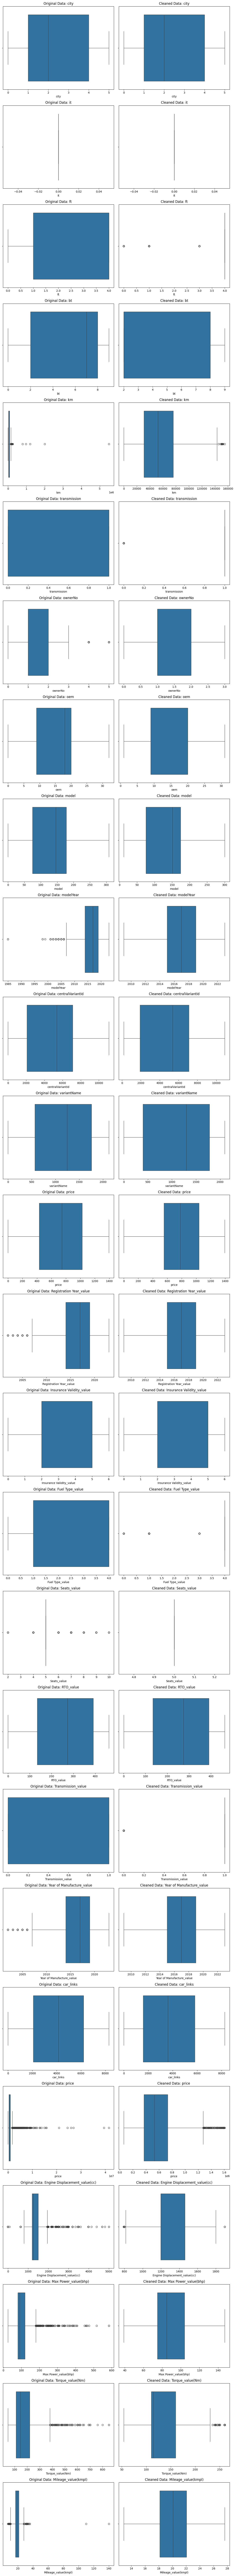

In [401]:
# Visualizing boxplots for all numerical columns

fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(12, 5 * len(numerical_cols)))

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    # Original Data
    sns.boxplot(ax=axes[i, 0], x=all_city_cars_df[col])
    axes[i, 0].set_title(f'Original Data: {col}')
    axes[i, 0].set_xlabel(col)
    
    # Cleaned Data
    sns.boxplot(ax=axes[i, 1], x=final_car_df[col])
    axes[i, 1].set_title(f'Cleaned Data: {col}')
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()